In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## New

### 1. rollout/return

In [22]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/"+itv+"/"
plot_save_dir = './plots_for_thesis/debug/ddpg/300_300NN/'
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 0 files found
PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point125\run_PLA_1569641711gra645_file.csv
Random: 0 files found


In [24]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

KeyError: 'rollout/Q_mean'

In [19]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_avg,rollout/Q_mean_std
0,6.879408,2.729707,4.804557,2.074851,-0.000111,0.006976,0.003432,0.003544
1,2.220029,0.000000,1.110015,1.110015,0.148148,0.042783,0.095466,0.052683
2,4.512201,1.492895,3.002548,1.509653,0.145507,0.058025,0.101766,0.043741
3,6.293494,0.626000,3.459747,2.833747,0.194801,0.060664,0.127732,0.067068
4,2.383948,3.408624,2.896286,0.512338,0.220201,0.061818,0.141010,0.079191
5,5.551126,8.419050,6.985088,1.433962,0.228064,0.072691,0.150378,0.077686
6,4.542733,2.824149,3.683441,0.859292,0.243010,0.085873,0.164442,0.078568
7,3.623404,5.539241,4.581323,0.957918,0.257480,0.098664,0.178072,0.079408
8,4.796696,4.110831,4.453763,0.342932,0.275653,0.106382,0.191018,0.084636
9,6.212403,1.949685,4.081044,2.131359,0.289721,0.118053,0.203887,0.085834


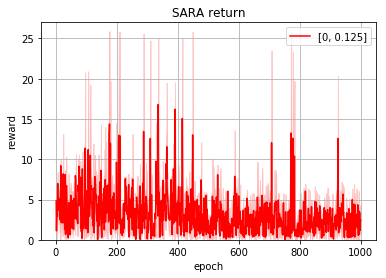

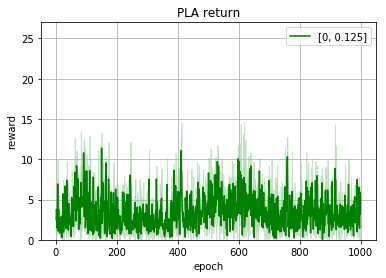

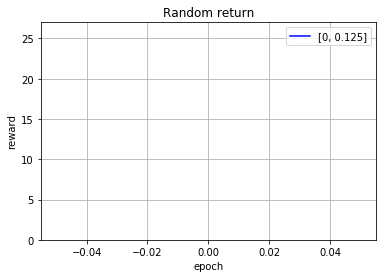

In [20]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


### 2.rollout/Q_mean

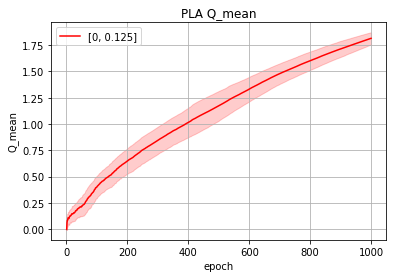

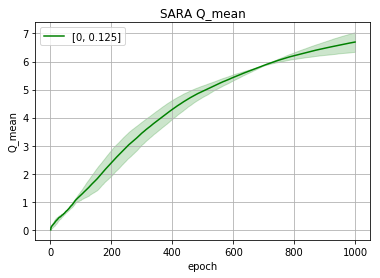

In [21]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

---------------------

# Gridsearch 

In [25]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/"+itv+"/"
plot_save_dir = './plots_for_thesis/single/gridsearch'
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 0 files found
PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point75\run_PLA_1569641711gra1068_file.csv
Random: 0 files found


In [26]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    
    metrics = ["rollout/return"]
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

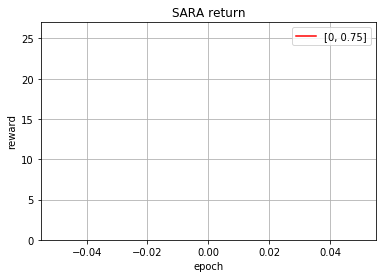

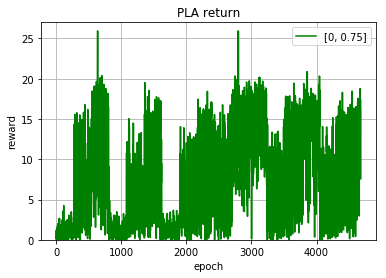

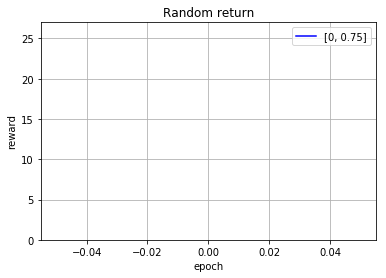

In [27]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
